In [ ]:
import numpy as np
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score



(100, 2)
(100,)


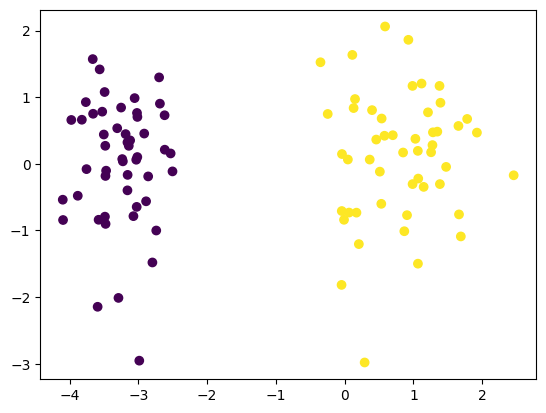

In [ ]:


X,Y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=20)

print(X.shape)
print(Y.shape)
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

In [ ]:
#sigmoid function

class MyLogistic:

  def __init__(self,lr=0.01,epochs=100):
    self.lr = lr
    self.epochs = epochs
    self.weights = None



  def sigmoid(self,x):
    return 1/(1+np.exp(-x))


  def fit(self,x,y):


    x=np.insert(x,0,1,axis=1)
    self.weights=np.ones(x.shape[1])


    for i in range(self.epochs):

      j=np.random.randint(0,x.shape[0])
      y_hat = self.sigmoid(np.dot(x[j],self.weights))

      self.weights=self.weights+self.lr*(y[j]-y_hat)*x[j] # here we use w=w+(y-y_hat)*x

    print(self.weights)


  def predict(self,x):
    x=np.insert(x,0,1,axis=1)
    y_pred=np.dot(self.weights,x.T)
    return y_pred



[2.13685961 2.28255841 0.03195296]
1.0


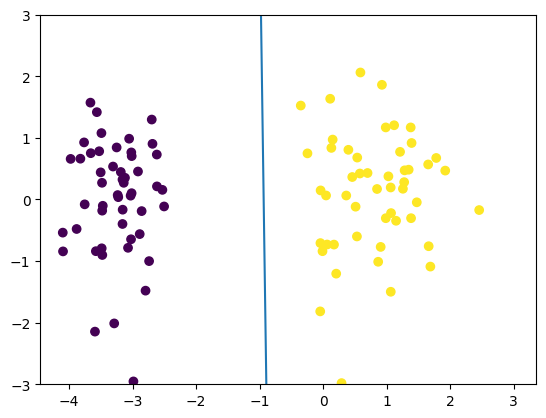

In [ ]:
mylog=MyLogistic(lr=0.04,epochs=1000)
mylog.fit(x_train,y_train)

y_pred=mylog.predict(x_test)
y_pred=np.where(y_pred>=0.5,1,0)

print(accuracy_score(y_test,y_pred))


#w0+w1x1+w2x2

m=-(mylog.weights[1]/mylog.weights[2])
c=-(mylog.weights[0]/mylog.weights[2])

x1=np.linspace(-3,3,100)

#line
y1=m*x1+c

plt.scatter(x_test[:,0],x_test[:,1],c=y_pred)
plt.scatter(x_train[:,0],x_train[:,1],c=y_train)
plt.plot(x1,y1)

plt.ylim(-3,3)

plt.show()

1.0
[3.18150071] [[2.26243944 0.00760614]]


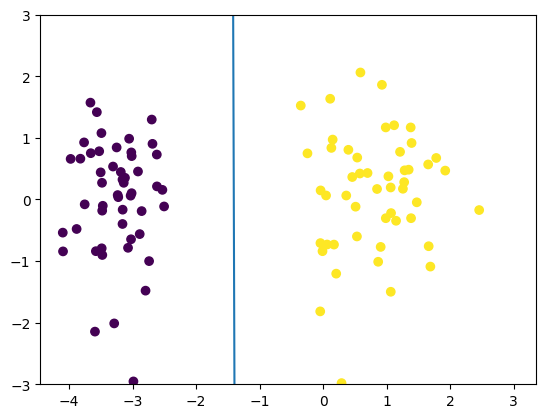

In [ ]:

sklog=LogisticRegression()
sklog.fit(x_train,y_train)


print(accuracy_score(y_test,sklog.predict(x_test)))
print(sklog.intercept_,sklog.coef_)


#w0+w1x1+w2x2

m=-(sklog.coef_[0][0]/sklog.coef_[0][1])
c=-(sklog.intercept_/sklog.coef_[0][1])

x1=np.linspace(-3,3,100)
y1=m*x1+c

plt.scatter(x_test[:,0],x_test[:,1],c=y_pred)
plt.scatter(x_train[:,0],x_train[:,1],c=y_train)
plt.plot(x1,y1)
plt.ylim(-3,3)
plt.show()
